In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df = pd.read_csv("Housing.csv")
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [72]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    str  
 6   guestroom         545 non-null    str  
 7   basement          545 non-null    str  
 8   hotwaterheating   545 non-null    str  
 9   airconditioning   545 non-null    str  
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    str  
 12  furnishingstatus  545 non-null    str  
dtypes: int64(6), str(7)
memory usage: 55.5 KB


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [73]:
df["price_per_sqft"] = df["price"] / df["area"]


In [74]:
yes_no_cols = ["mainroad", "guestroom", "basement",
               "hotwaterheating", "airconditioning", "prefarea"]

for col in yes_no_cols:
    df[col] = df[col].map({"yes":1, "no":0})


In [75]:
df = pd.get_dummies(df, columns=["furnishingstatus"], drop_first=True)


In [76]:
X = df.drop("price", axis=1)
y = df["price"]


In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [78]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [79]:
importance = pd.Series(model.coef_, index=X.columns)
print(importance.sort_values(ascending=False))


bathrooms                          526301.363831
airconditioning                    483615.295175
guestroom                          282992.626620
mainroad                           281325.962947
hotwaterheating                    179654.338906
stories                            150078.496632
prefarea                           141886.382181
parking                            125049.478525
basement                            12760.093098
price_per_sqft                       3267.656312
area                                  583.229467
bedrooms                            -2777.338861
furnishingstatus_unfurnished       -16516.528562
furnishingstatus_semi-furnished    -31347.618536
dtype: float64


In [80]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

importance = pd.Series(rf.feature_importances_, index=X.columns)
print(importance.sort_values(ascending=False))


area                               0.521335
price_per_sqft                     0.435821
bathrooms                          0.012399
parking                            0.010181
bedrooms                           0.005588
prefarea                           0.002695
stories                            0.002642
furnishingstatus_unfurnished       0.002017
basement                           0.001752
airconditioning                    0.001680
furnishingstatus_semi-furnished    0.001564
guestroom                          0.000931
hotwaterheating                    0.000735
mainroad                           0.000659
dtype: float64


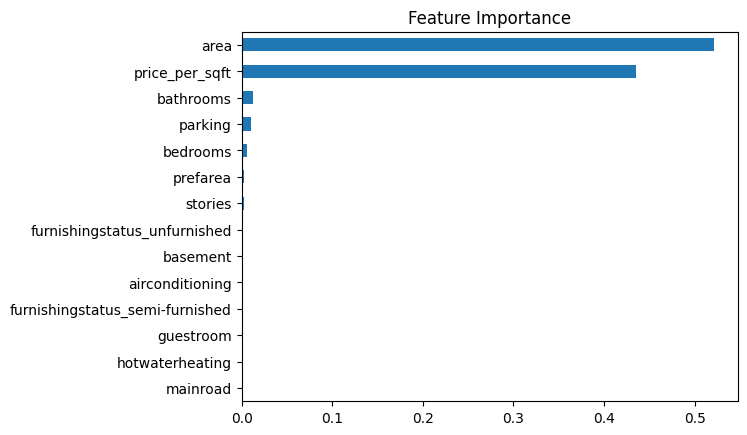

In [81]:
importance.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()
